## In this IDATAHACK challenge, participants are provided with a comprehensive dataset comprising 2,056,160 rows and 44 columns, The dataset is centered around customer interactions with various banking products and services, making it an excellent resource for advanced modeling of customer behavior and engagement. The goal is to build a predictive model that determines whether a customer will repay their debt. ## 




Sets up the necessary libraries and imports functions for performing data analysis, visualization, and building a machine learning model. 

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [33]:
ad_data = pd.read_csv('training.csv')

The code is used to inspect and understand the dataset before you start any analysis or modeling:

1.ad_data.info()  a summary of the dataset's structure.<br>
2.ad_data.head() shows the first few rows of data, providing a glimpse into the actual content of the dataset.

In [42]:
print(ad_data.info())
print("\
First few rows of the dataset:")
ad_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056160 entries, 0 to 2056159
Data columns (total 44 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   client_id                     int64  
 1   product8                      int64  
 2   product10                     int64  
 3   product13                     int64  
 4   product12                     int64  
 5   product11                     int64  
 6   product4                      int64  
 7   product17                     int64  
 8   product2                      int64  
 9   product3                      int64  
 10  product1                      int64  
 11  product7                      int64  
 12  product6                      int64  
 13  product5                      int64  
 14  product14                     int64  
 15  product15                     int64  
 16  product16                     int64  
 17  product9                      int64  
 18  has_products          

,client_id,product8,product10,product13,product12,product11,product4,product17,product2,product3,...,counter_num_inbound,counter_num_outbound,securities_operations,securities_bought,securities_sold,counter_amt_tot,counter_num_tot,period,category,repays_debt
0,0,1,0,0,0,1,0,0,1,1,...,45,61,0,0,0,192148.965822,106,1,2,0
1,0,1,1,1,1,0,0,0,1,1,...,31,50,0,0,0,-56342.014232,81,2,2,0
2,0,1,0,1,0,0,1,0,0,1,...,16,47,0,0,0,-159247.483476,63,3,2,0
3,0,1,1,1,0,1,1,1,0,1,...,24,53,0,0,0,12234.918920,77,4,2,0
4,0,1,0,1,1,1,0,0,0,1,...,24,53,0,0,0,-104456.783924,77,5,2,0


The code is used to print a heading ("Summary statistics:") and then display the summary statistics for the numerical data in the ad_data DataFrame. This helps you quickly understand the distribution and key characteristics of the data.









In [44]:
print("\
Summary statistics:")
ad_data.describe()

Summary statistics:


,client_id,product8,product10,product13,product12,product11,product4,product17,product2,product3,...,counter_num_inbound,counter_num_outbound,securities_operations,securities_bought,securities_sold,counter_amt_tot,counter_num_tot,period,category,repays_debt
count,2.056160e+06,2.056160e+06,2.056160e+06,2.056160e+06,2.056160e+06,2.056160e+06,2.056160e+06,2.056160e+06,2.056160e+06,2.056160e+06,...,2.056160e+06,2.056160e+06,2.056160e+06,2.056160e+06,2.056160e+06,2.056160e+06,2.056160e+06,2.056160e+06,2.056160e+06,2.056160e+06
mean,5.173345e+04,2.386609e-01,2.843013e-01,2.253502e-01,2.000948e-01,2.254596e-01,2.029195e-01,2.848319e-01,4.942354e-01,5.005564e-01,...,1.922663e+00,1.620659e+00,6.060715e-02,3.455519e-02,2.594983e-02,4.738936e+03,3.543322e+00,1.050000e+01,2.707649e+00,3.251692e-03
std,2.983887e+04,4.262651e-01,4.510811e-01,4.178128e-01,4.000712e-01,4.178847e-01,4.021732e-01,4.513345e-01,4.999669e-01,4.999998e-01,...,1.435850e+01,6.585753e+00,3.049697e+00,1.674895e+00,1.462421e+00,1.473733e+05,1.799122e+01,5.766283e+00,6.328854e-01,5.693084e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.050285e+08,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.592775e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.750000e+00,3.000000e+00,0.000000e+00
50%,5.173850e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.050000e+01,3.000000e+00,0.000000e+00
75%,7.756425e+04,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.525000e+01,3.000000e+00,0.000000e+00
max,1.034850e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.639000e+03,7.540000e+02,1.238000e+03,6.980000e+02,5.910000e+02,6.173115e+07,1.713000e+03,2.000000e+01,3.000000e+00,1.000000e+00


In [34]:
ad_data

,client_id,product8,product10,product13,product12,product11,product4,product17,product2,product3,...,counter_num_inbound,counter_num_outbound,securities_operations,securities_bought,securities_sold,counter_amt_tot,counter_num_tot,period,category,repays_debt
0,0,1,0,0,0,1,0,0,1,1,...,45,61,0,0,0,192148.965822,106,1,2,0
1,0,1,1,1,1,0,0,0,1,1,...,31,50,0,0,0,-56342.014232,81,2,2,0
2,0,1,0,1,0,0,1,0,0,1,...,16,47,0,0,0,-159247.483476,63,3,2,0
3,0,1,1,1,0,1,1,1,0,1,...,24,53,0,0,0,12234.918920,77,4,2,0
4,0,1,0,1,1,1,0,0,0,1,...,24,53,0,0,0,-104456.783924,77,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056155,103485,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.000000,0,16,1,0
2056156,103485,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,17,1,0
2056157,103485,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.000000,0,18,1,0
2056158,103485,0,0,0,0,0,0,0,1,1,...,2,0,0,0,0,201.536744,2,19,1,0


The code is used to print a heading ("Missing values:") and then display the count of missing values in each column of the ad_data DataFrame. This helps you quickly identify columns with missing data, which is an important step in data cleaning and preprocessing.

In [46]:
print("\
Missing values:")
ad_data.isnull().sum()

Missing values:


client_id                       0
product8                        0
product10                       0
product13                       0
product12                       0
product11                       0
product4                        0
product17                       0
product2                        0
product3                        0
product1                        0
product7                        0
product6                        0
product5                        0
product14                       0
product15                       0
product16                       0
product9                        0
has_products                    0
balance                         0
left_bank                       0
joined_bank                     0
wire_transfers2_amt_inbound     0
wire_transfers1_amt_inbound     0
wire_transfers2_amt_outbound    0
wire_transfers1_amt_outbound    0
counter_amt_inbound             0
counter_amt_outbound            0
securities_bought_amt           0
securities_sol

In [47]:
numerical_columns = ad_data.select_dtypes(include=[np.number]).columns.tolist()

The code creates a 3x3 grid of histograms for the first 9 numerical columns in the ad_data dataset, displaying the distribution of each variable with a title and kernel density estimate (KDE).

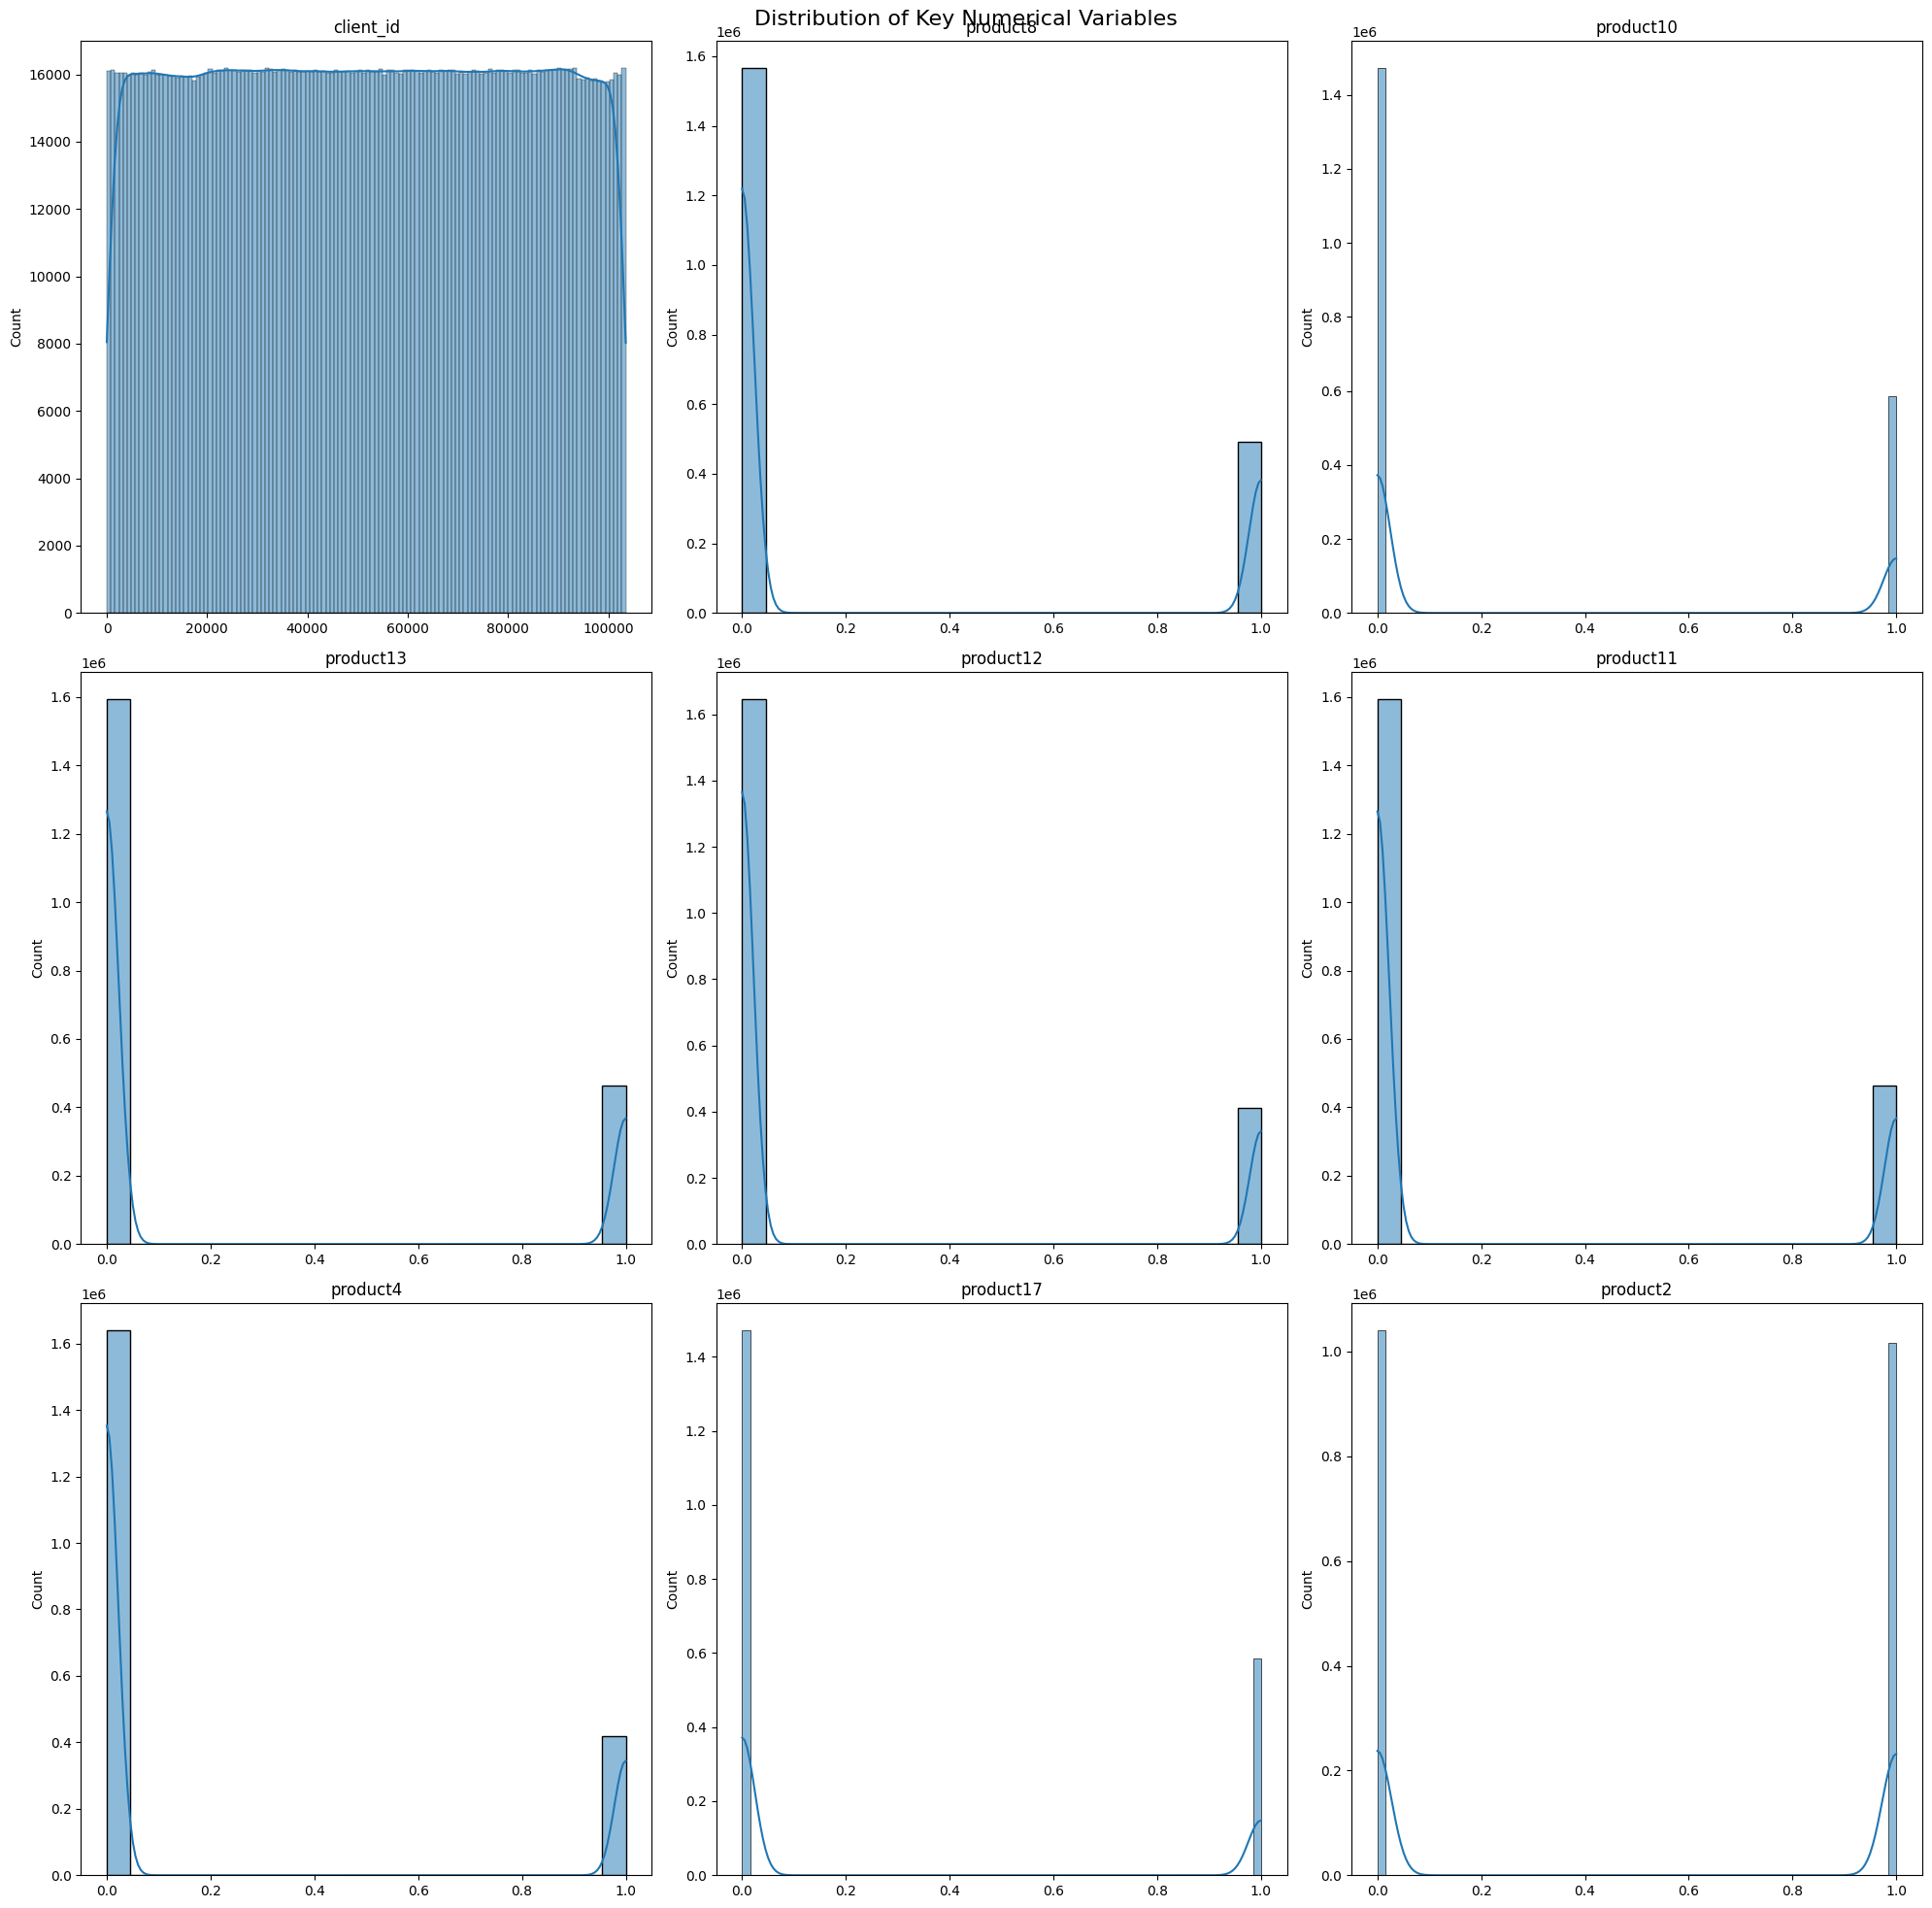

In [49]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Distribution of Key Numerical Variables', fontsize=16)

for i, col in enumerate(numerical_columns[:9]): 
    ax = axes[i // 3, i % 3]
    sns.histplot(ad_data[col], ax=ax, kde=True)
    ax.set_title(col)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()


The code calculates the correlation matrix for the numerical columns in the ad_data dataset and visualizes it using a heatmap. The heatmap uses the coolwarm color scheme to represent the strength of correlations between variables, with a title indicating what the heatmap shows.

In [50]:
correlation_matrix = ad_data[numerical_columns].corr()

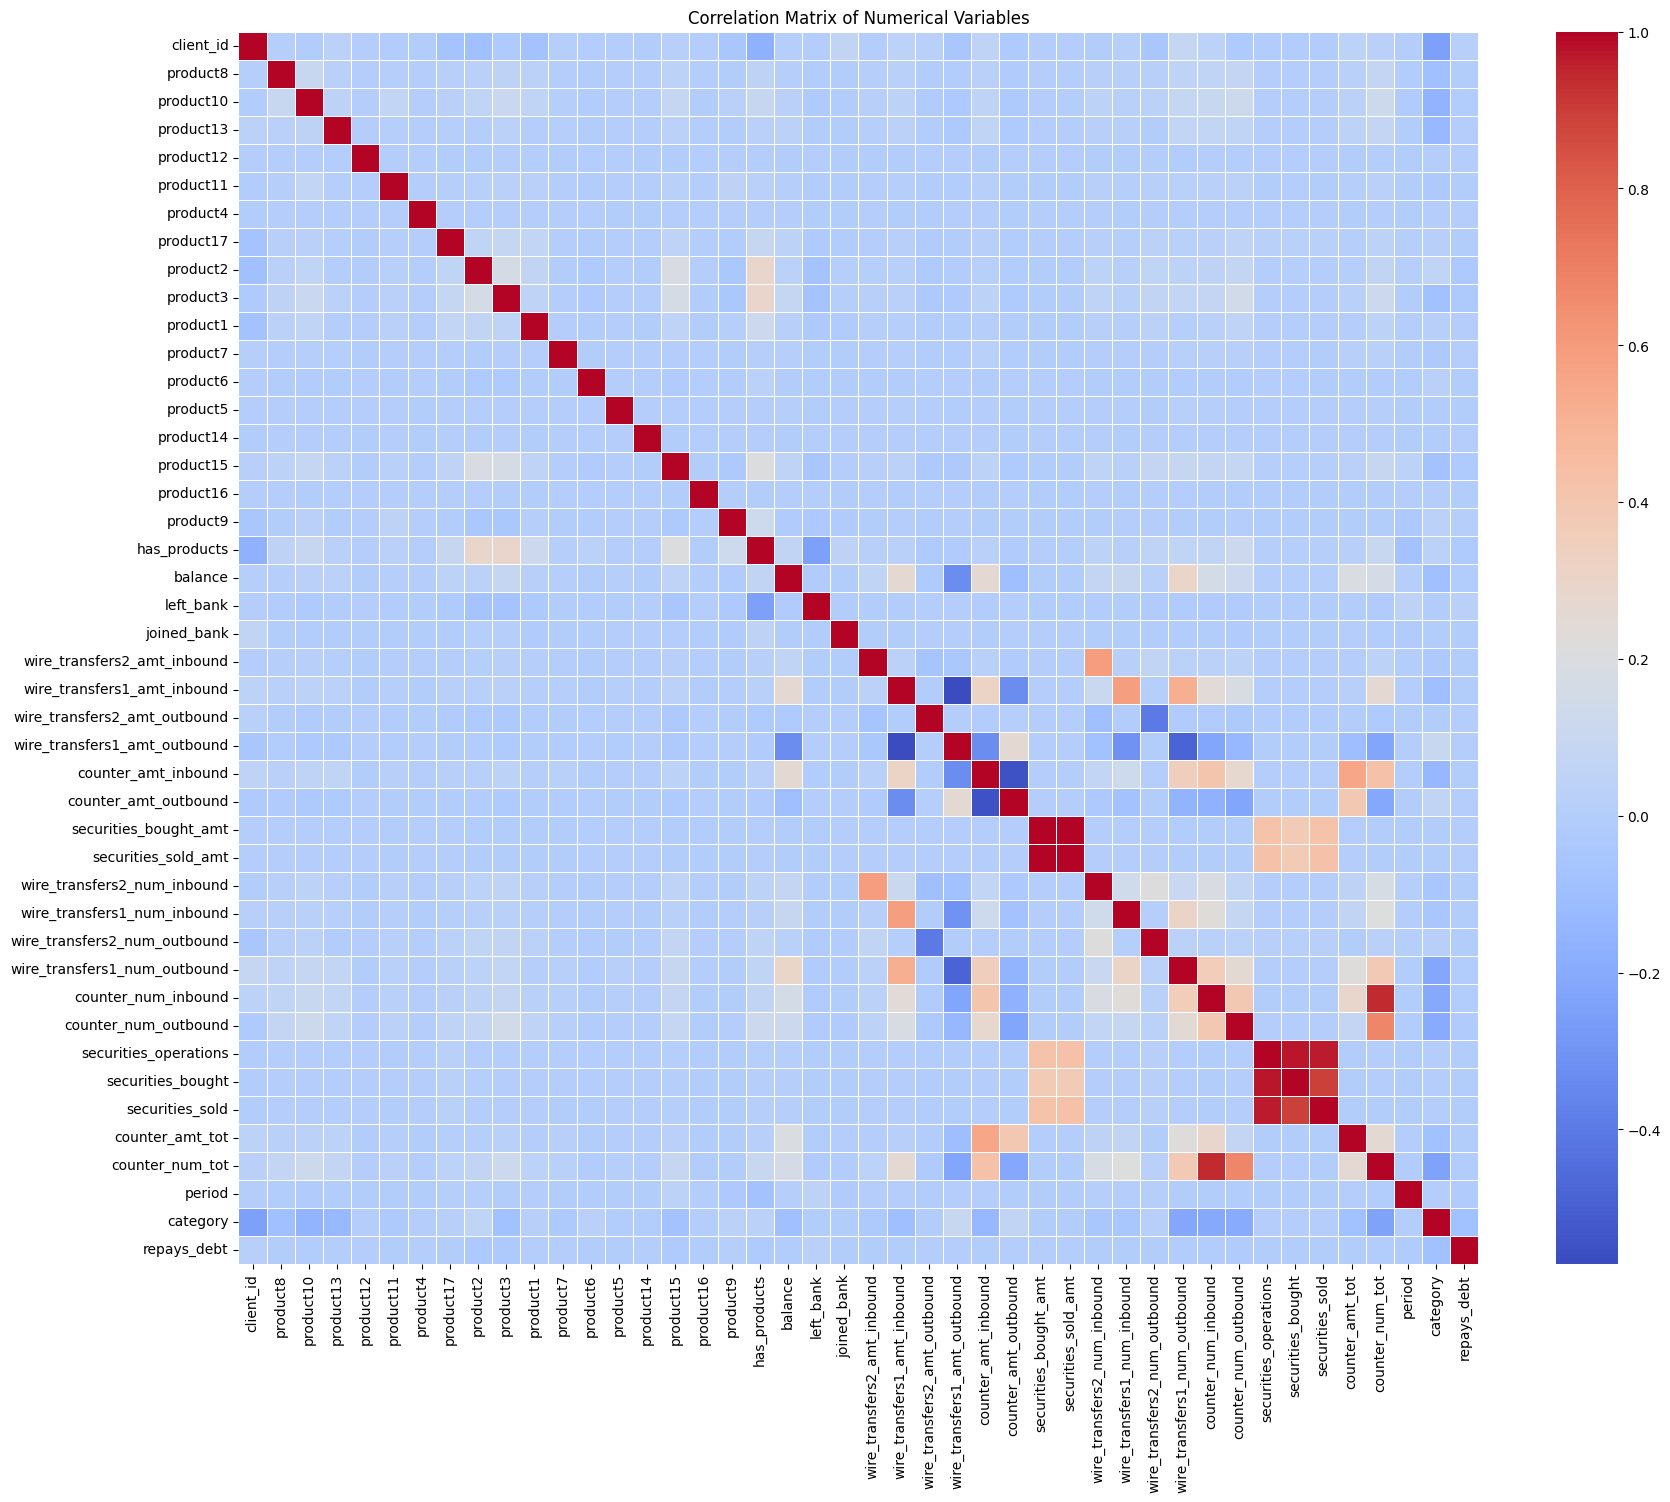

In [51]:
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Visualizing the distribution of product ownership among customers. It sums up the number of customers who own each product, sorts them in descending order, and then creates a bar chart to display which products are most commonly owned. The chart helps to quickly identify the popularity of different products.

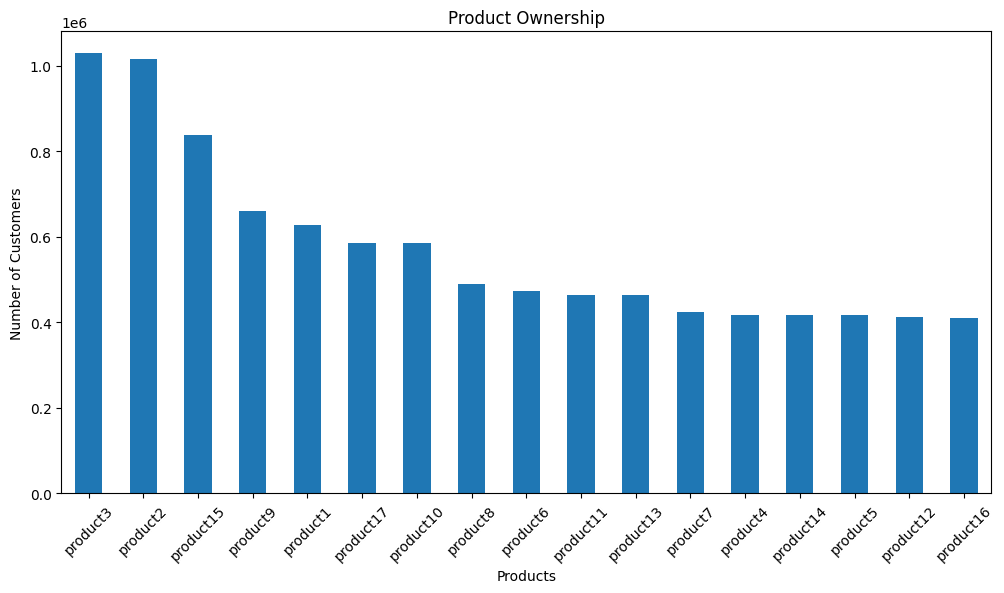

In [52]:
product_columns = [col for col in ad_data.columns if col.startswith('product')]
product_ownership = ad_data[product_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
product_ownership.plot(kind='bar')
plt.title('Product Ownership')
plt.xlabel('Products')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

The code generates a scatter plot to analyze customer segmentation based on balance and inbound transfer amounts, and provides key insights including the total number of customers, the most and least popular products, average balance, and the percentage of customers who left the bank.

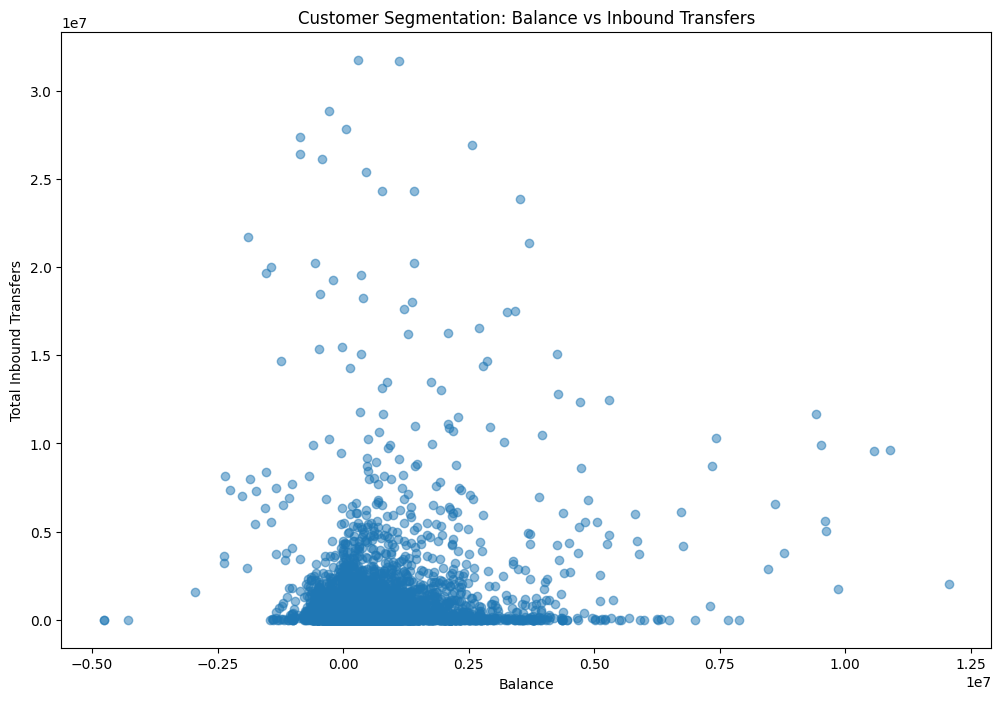

EDA completed. Key insights:
1. Total number of customers: 2056160
2. Most popular product: product3 (1029224 customers)
3. Least popular product: product16 (411196 customers)
4. Average customer balance: 9871.90
5. Percentage of customers who left the bank: 1.42%


In [55]:
plt.figure(figsize=(12, 8))
plt.scatter(ad_data['balance'], ad_data['wire_transfers1_amt_inbound'] + ad_data['wire_transfers2_amt_inbound'],
            alpha=0.5)
plt.title('Customer Segmentation: Balance vs Inbound Transfers')
plt.xlabel('Balance')
plt.ylabel('Total Inbound Transfers')
plt.show()

print("EDA completed. Key insights:")
print(f"1. Total number of customers: {len(ad_data)}")
print(f"2. Most popular product: {product_ownership.index[0]} ({product_ownership.iloc[0]} customers)")
print(f"3. Least popular product: {product_ownership.index[-1]} ({product_ownership.iloc[-1]} customers)")
print(f"4. Average customer balance: {ad_data['balance'].mean():.2f}")
print(f"5. Percentage of customers who left the bank: {(ad_data['left_bank'].sum() / len(ad_data) * 100):.2f}%")

In [35]:
ad_data_1 = ad_data[ad_data['repays_debt'] ==1]

In [36]:
ad_data_0 = ad_data.sample(len(ad_data_1), replace= False)
ad_data_0

,client_id,product8,product10,product13,product12,product11,product4,product17,product2,product3,...,counter_num_inbound,counter_num_outbound,securities_operations,securities_bought,securities_sold,counter_amt_tot,counter_num_tot,period,category,repays_debt
963214,48478,1,1,1,1,1,1,1,1,0,...,10,4,0,0,0,20414.539272,14,15,1,0
2036160,102485,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,1,1,0
836207,42094,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0.000000,0,8,3,0
1200630,60405,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0.000000,0,11,3,0
1934639,97311,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453682,22903,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0.000000,0,3,3,0
1432526,72055,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0.000000,0,7,3,0
288316,14546,1,0,0,0,0,0,0,1,1,...,13,17,0,0,0,-1244.135026,30,17,2,0
43132,2167,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0.000000,0,13,3,0


In [23]:
ad_data_total = pd.concat([ad_data_0, ad_data_1], axis= 0)

The code scales the features, performs a grid search to find the best hyperparameters for a Random Forest model using cross-validation, and then trains the model with the best parameters found.









In [37]:


from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)


param_grid = {  'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion' :['gini', 'entropy']
             }
rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train_scaled, y)


best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train_scaled, y)


Best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=300)

Fitting the model with RandomForrestClassifier and the best parametter that we found


In [38]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
# Separate features and target variable
ad_data_1 = ad_data[ad_data['repays_debt'] ==1]
ad_data_0 = ad_data.sample(len(ad_data_1), replace= False)
ad_data_total = pd.concat([ad_data_0, ad_data_1], axis= 0)


X = ad_data_total[[ 'product1', 'product2', 'product3', 'product4', 'product5',
      'product6', 'product7', 'product8', 'product9', 'product10',
      'product11', 'product12', 'product13', 'product14', 'product15',
      'product16', 'has_products', 'balance', 'left_bank', 'joined_bank','wire_transfers2_amt_inbound', 'wire_transfers1_amt_inbound',
      'wire_transfers2_amt_outbound', 'wire_transfers1_amt_outbound',
      'counter_amt_inbound', 'counter_amt_outbound', 'securities_bought_amt',
      'securities_sold_amt', 'wire_transfers2_num_inbound',
      'wire_transfers1_num_inbound', 'wire_transfers2_num_outbound',
      'wire_transfers1_num_outbound', 'counter_num_inbound',
      'counter_num_outbound', 'securities_operations', 'securities_bought',
      'securities_sold', 'counter_amt_tot', 'counter_num_tot', 'period',
      'category']]



y = ad_data_total['repays_debt']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
rf_model = RandomForestClassifier(
    bootstrap=False,
    criterion='entropy',
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=300
)
rf_model.fit(X_train_scaled,y)


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       min_samples_split=5, n_estimators=300)

In [59]:
submission_data = pd.read_csv('test.csv')
submission_df = submission_data[submission_data['repays_debt'] == '??']
submission_df

,client_id,product8,product10,product13,product12,product11,product4,product17,product2,product3,...,counter_num_inbound,counter_num_outbound,securities_operations,securities_bought,securities_sold,counter_amt_tot,counter_num_tot,period,category,repays_debt
9,1,1,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0.000000,0,10,3,??
17,11,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0.000000,0,8,3,??
26,19,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0.000000,0,9,3,??
35,28,1,1,1,0,1,0,0,1,1,...,3,5,0,0,0,40333.781236,8,9,1,??
46,37,1,0,0,0,0,0,1,1,0,...,0,6,0,0,0,-2041.974823,6,11,3,??
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853,7843,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.000000,0,12,1,??
7861,7855,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0.000000,0,8,3,??
7873,7863,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.000000,0,12,1,??
7881,7875,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0.000000,0,8,1,??


In [60]:

import pandas as pd
submission_data = pd.read_csv('test.csv')

X_submission = submission_df[['product1', 'product2', 'product3', 'product4', 'product5', 'product6', 'product7',
                   'product8', 'product9', 'product10','product11', 'product12','product13', 'product14', 'product15','product16','has_products', 'balance',
       'left_bank', 'joined_bank','wire_transfers2_amt_inbound', 'wire_transfers1_amt_inbound',
       'wire_transfers2_amt_outbound', 'wire_transfers1_amt_outbound',
       'counter_amt_inbound', 'counter_amt_outbound', 'securities_bought_amt',
       'securities_sold_amt', 'wire_transfers2_num_inbound',
       'wire_transfers1_num_inbound', 'wire_transfers2_num_outbound',
       'wire_transfers1_num_outbound', 'counter_num_inbound',
       'counter_num_outbound', 'securities_operations', 'securities_bought',
       'securities_sold', 'counter_amt_tot', 'counter_num_tot', 'period',
       'category']]




# Scale the features
X_submission_scaled = scaler.transform(X_submission)

predictions_submission = rf_model.predict(X_submission_scaled)

submission_final = pd.DataFrame(predictions_submission, columns=['repays_debt'])

# Save the predictions to a CSV file
submission_final.to_csv('submission.csv', index=False)




In [16]:


import pandas as pd
# Load the submission data
submission_data = pd.read_csv('submission.csv')

# Select the features for prediction

X_submission = submission_data[['product1', 'product2', 'product3', 'product4', 'product5', 'product6', 'product7',
                   'product8', 'product9', 'product10','product11', 'product12','product13', 'product14', 'product15','product16','has_products', 'balance',
       'left_bank', 'joined_bank','wire_transfers2_amt_inbound', 'wire_transfers1_amt_inbound',
       'wire_transfers2_amt_outbound', 'wire_transfers1_amt_outbound',
       'counter_amt_inbound', 'counter_amt_outbound', 'securities_bought_amt',
       'securities_sold_amt', 'wire_transfers2_num_inbound',
       'wire_transfers1_num_inbound', 'wire_transfers2_num_outbound',
       'wire_transfers1_num_outbound', 'counter_num_inbound',
       'counter_num_outbound', 'securities_operations', 'securities_bought',
       'securities_sold', 'counter_amt_tot', 'counter_num_tot', 'period',
       'category']]




# Scale the features
X_submission_scaled = scaler.transform(X_submission)

# Make predictions
predictions_submission = rf_model.predict(X_submission_scaled)

# Create a DataFrame with the predictions
submission_final = pd.DataFrame(predictions_submission, columns=['repays_debt'])

# Save the predictions to a CSV file
submission_final.to_csv('submission_final.csv', index=False)




Evaluate my model with f1 score

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5054
           1       0.81      0.82      0.81      2118

    accuracy                           0.89      7172
   macro avg       0.87      0.87      0.87      7172
weighted avg       0.89      0.89      0.89      7172



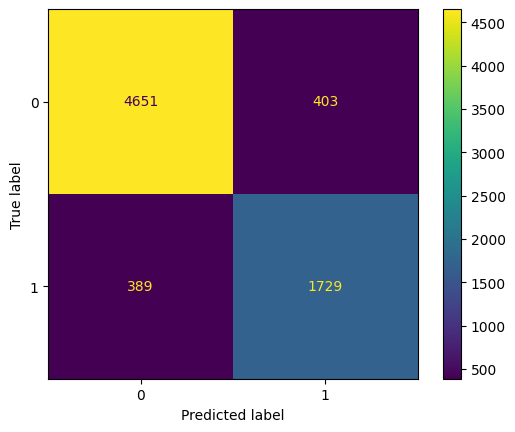

In [62]:


import matplotlib.pyplot as plt
# Select rows with "???" in the 'repays_debt' column
test_df = submission_data[submission_data['repays_debt'] != '??']

# Extract features from the submission DataFrame
X_test = test_df[[ 'product1', 'product2', 'product3', 'product4', 'product5',
      'product6', 'product7', 'product8', 'product9', 'product10',
      'product11', 'product12', 'product13', 'product14', 'product15',
      'product16', 'has_products', 'balance', 'left_bank', 'joined_bank','wire_transfers2_amt_inbound', 'wire_transfers1_amt_inbound',
      'wire_transfers2_amt_outbound', 'wire_transfers1_amt_outbound',
      'counter_amt_inbound', 'counter_amt_outbound', 'securities_bought_amt',
      'securities_sold_amt', 'wire_transfers2_num_inbound',
      'wire_transfers1_num_inbound', 'wire_transfers2_num_outbound',
      'wire_transfers1_num_outbound', 'counter_num_inbound',
      'counter_num_outbound', 'securities_operations', 'securities_bought',
      'securities_sold', 'counter_amt_tot', 'counter_num_tot', 'period',
      'category']]

# Extract the actual labels
y_test = test_df['repays_debt'].astype(int)

# Scale the features
X_test_scaled = scaler.transform(X_test)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()
plt.show()
